# Aufgabe 24

Die Parameter einer Ausgleichsgeraden 𝑦 = 𝑎0+𝑎1𝑥 wurden zu 𝑎0=1,0±0,2 und 𝑎1=1,0±0,2 bestimmt. Der Korrelationskoefffizient ist 𝜌 = −0,8. Bestimmen Sie die Unsicherheit eines Wertes 𝑦 als Funktion von 𝑥.

(a)Bestimmen Sie das Resultat analytisch sowohl unter Berücksichtigung der Korrelation als auch unter Vernachlässigung der Korrelation

Vernachlässigung der Korrelation:
\begin{align}
\sigma_y^2 &= (\frac{\partial y}{\partial a_0} \sigma_{a0})^2 +(\frac{\partial y}{\partial a_1} \sigma_{a1})^2 \\
&= \sigma_{a0}^2 + x^2\sigma_{a1}^2 = 0,04 + 0,04 x^2
\end{align}

Berücksichtigung der Korrelation: 
\begin{align}
\sigma_y^2 &= (\frac{\partial y}{\partial a_0} \sigma_{a0})^2 +(\frac{\partial y}{\partial a_1} \sigma_{a1})^2 + 2 \frac{\partial y}{\partial a_0}\frac{\partial y}{\partial a_1} \cdot cov \\
&= \sigma_{a0}^2 + x^2\sigma_{a1}^2 +2 x \cdot cov  \\
&= \sigma_{a0}^2 + x^2\sigma_{a1}^2 +2 x \cdot \rho \sigma_{a0} \sigma_{a1} \\
&= 0,04 + 0,04 x^2 -0,064x
\end{align}

(b)Bestimmen Sie das Resultat numerisch mit einer Monte Carlo Simulation. Visualisieren Sie die Parameter 𝑎0 und 𝑎1 in einem Scatter-Plot.

In [9]:
import numpy as np
import uncertainties as unc
from uncertainties import ufloat
from uncertainties import correlated_values
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [10]:
a_0= ufloat(1,0.2)
a_1= ufloat(1,0.2)




## Ohne Korrelation

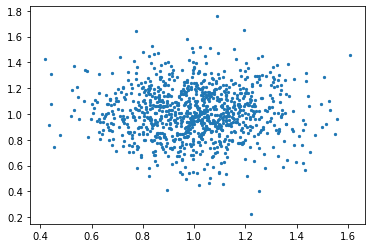

In [11]:
#Scatterplot ohne Korrelation

mu1, sigma1 = 1, 0.2 # mean and standard deviation

s1 = np.random.normal(mu1, sigma1, 1000)

mu2, sigma2 = 1, 0.2 # mean and standard deviation

s2 = np.random.normal(mu2, sigma2, 1000)

plt.scatter(s1,s2,s=5)
plt.show()

In [16]:
xWerte=np.linspace(-10,10,100) 
#ich weiß nicht in welchem Intervall x ist, bzw was die Grenzen der Ausgleichsgeraden sind
#, deswegen x-Intervall selber ausgesucht.


#Wir definieren eine Funktion, die die Unsicherheit von y in Abhängikeit von x darstellt.
#zweite Ordnung, weil wir das schon aus der a) wissen
def sigmay(x, a, b, c):
    return a*x**2+b*x+c


#Fehler der y-Werte mit Monte Carlo simulieren
fehlery=[]
for x in xWerte:
    y=s1+s2*x
    yy = np.var(y)
    fehlery.append(yy)
print(yy)
#Ausgleichskurve liefert uns dann die Parameter a,b,c. 
#Dafür muss sigmay an unsere simulierten Werte gefittet werden.
params, cov0 = curve_fit(sigmay, xWerte, fehlery) 

a, b, c = params

print(a, b, c)

4.060797692042788
0.040290047264616984 -0.0005778984906811916 0.03757195048790256


Numerisches Ergebnis ohne Berücksichtigung der Korrelation: $\sigma_y^2= 0,039 x^2+ 0,003 x + 0,041$

## Mit Korrelation

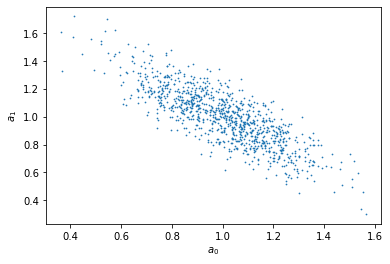

In [13]:
rho=-0.8
cov= np.array([ [a_0.s**2, rho*a_0.s*a_1.s], 
               [rho*a_0.s*a_1.s, a_1.s**2]])

mean=[a_0.n, a_1.n]
Korr = np.random.multivariate_normal(mean, cov, size=10**3, check_valid='warn', tol=1e-8)

np.shape(Korr)

a0_korr=Korr[:,0]
a1_korr=Korr[:,1]
plt.scatter(a0_korr, a1_korr, s=0.5)
plt.xlabel(r'$a_0$')
plt.ylabel(r'$a_1$')
plt.show()

In [14]:

#Fehler der y-Werte mit Monte Carlo simulieren
fehlery=[]
for x in xWerte:
    y=a0_korr+a1_korr*x
    yy = np.var(y)
    fehlery.append(yy)
print(yy)
#Ausgleichskurve liefert uns dann die Parameter a,b,c. Dafür muss sigmay an unsere simulierten Werte gefittet werden.
params, cov0 = curve_fit(sigmay, xWerte, fehlery) 

a, b, c = params
print(params)
print(a, b, c)

3.572855231225237
[ 0.041906   -0.06561236  0.0383786 ]
0.04190600247393379 -0.06561236209586449 0.03837860479050309


Numerisches Ergebnis mit Berücksichtigung der Korrelation: $\sigma_y^2= 0,039 x^2- 0,060 x + 0,037$

c) Bestimmen Sie die Vorhersagen 𝑦(Mittelwert und Standardabweichung) für feste 𝑥=−3,0,+3  numerisch sowie analytisch und vergleichen Sie diese

In [15]:

def y_varianz(x, sigma_a0, sigma_a1, cov):
    return sigma_a0**2+x**2*sigma_a1**2+2*cov*x
x_c=[-3,0,3]
for x in x_c:
    print('x=',x,':')
    mean_ana= 1+x #denn y=a_0+a_1*x mit a_0 und a_1=1
    std_ana=np.sqrt(y_varianz(x,0.2,0.2, -0.032))
    print( 'Analytischer Mittelwert=', mean_ana)
    print('Analytische Standardabweichung:', std_ana)
    y= a0_korr + a1_korr *x #Monte Carlo Berechnung
    mean_monte=np.mean(y)
    std_monte=np.std(y)
    print('Mittelwert nach Monte Carlo=',mean_monte)
    print('Standardabweichung nach MC=', std_monte)
    Abweichung_mean=(mean_ana-mean_monte)/mean_ana*100
    Abweichung_std=(std_ana-std_monte)/std_ana*100
    print('Abweichung Mittelwert=', Abweichung_mean, '%')
    print('Abweichung Standardabweichung=', Abweichung_std, '%')

x= -3 :
Analytischer Mittelwert= -2
Analytische Standardabweichung: 0.7694153624668538
Mittelwert nach Monte Carlo= -1.9921332000192467
Standardabweichung nach MC= 0.7825405506064851
Abweichung Mittelwert= 0.39333999903766736 %
Abweichung Standardabweichung= -1.7058650996452767 %
x= 0 :
Analytischer Mittelwert= 1
Analytische Standardabweichung: 0.2
Mittelwert nach Monte Carlo= 1.0014279896138782
Standardabweichung nach MC= 0.19590458083082973
Abweichung Mittelwert= -0.14279896138782444 %
Abweichung Standardabweichung= 2.0477095845851387 %
x= 3 :
Analytischer Mittelwert= 4
Analytische Standardabweichung: 0.45607017003965533
Mittelwert nach Monte Carlo= 3.9949891792470034
Standardabweichung nach MC= 0.46764895035519294
Abweichung Mittelwert= 0.1252705188249159 %
Abweichung Standardabweichung= -2.5388155323841572 %
